#  Real Estate Value Prediction for Different Locations

In this project, we dive into the real estate landscape by analyzing price trends across different zip codes, utilizing data sourced from Zillow Research. 

Acting as consultants for MDN real estate investment firm, our objective is to identify the best locations for their investments. Our analysis will explore the potential correlation with size rank and value of property as an indicator, helping us find the top 10 counties deemed most promising for investment, while also flagging the bottom 10 that warrant caution.

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Import data
data = pd.read_csv('zillow_data.csv')
data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
print(f"Column names: {data.columns}")

Column names: Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)


In [5]:
data['SizeRank'].value_counts()

SizeRank
1        1
9807     1
9809     1
9810     1
9811     1
        ..
4912     1
4913     1
4914     1
4915     1
14723    1
Name: count, Length: 14723, dtype: int64

In [6]:
data['CountyName'].value_counts()

CountyName
Los Angeles    264
Jefferson      175
Orange         166
Washington     164
Montgomery     159
              ... 
Uintah           1
Rains            1
Benewah          1
Pettis           1
Licking          1
Name: count, Length: 1212, dtype: int64

In [7]:
data.nunique()

RegionID      14723
RegionName    14723
City           7554
State            51
Metro           701
              ...  
2017-12        5248
2018-01        5276
2018-02        5303
2018-03        5332
2018-04        5310
Length: 272, dtype: int64

# Data Cleaning

In [8]:
#Convert the columns into rows
data_new = pd.melt(data, id_vars=data.columns[:7], 
                  value_vars=data.columns[7:241], 
                  var_name="date", 
                  value_name="value_of_property")

In [22]:
data_new

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value_of_property
date,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0
...,...,...,...,...,...,...,...,...
2015-09-01,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,191900.0
2015-09-01,59107,3293,Woodstock,NH,Claremont,Grafton,14720,189500.0
2015-09-01,75672,40404,Berea,KY,Richmond,Madison,14721,107800.0


In [13]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445182 entries, 0 to 3445181
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   RegionID           int64  
 1   RegionName         int64  
 2   City               object 
 3   State              object 
 4   Metro              object 
 5   CountyName         object 
 6   SizeRank           int64  
 7   date               object 
 8   value_of_property  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 236.6+ MB


In [14]:
# descriptive statistics on vlue of property
data_new['value_of_property'].describe()

count    3.288291e+06
mean     1.996140e+05
std      2.187169e+05
min      1.130000e+04
25%      9.550000e+04
50%      1.433000e+05
75%      2.289000e+05
max      1.796580e+07
Name: value_of_property, dtype: float64

In [15]:
# Convert date to a datetime column
data_new['date'] = pd.to_datetime(data_new['date'])

In [16]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445182 entries, 0 to 3445181
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   RegionID           int64         
 1   RegionName         int64         
 2   City               object        
 3   State              object        
 4   Metro              object        
 5   CountyName         object        
 6   SizeRank           int64         
 7   date               datetime64[ns]
 8   value_of_property  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 236.6+ MB


In [17]:
# make date the index 
data_new.set_index('date', inplace=True)

In [18]:
# inspect the index
data_new.index

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2015-09-01', '2015-09-01', '2015-09-01', '2015-09-01',
               '2015-09-01', '2015-09-01', '2015-09-01', '2015-09-01',
               '2015-09-01', '2015-09-01'],
              dtype='datetime64[ns]', name='date', length=3445182, freq=None)

In [21]:
data_new.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value_of_property
date,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0


In [23]:
# Deal with missing values
data_new.isnull().sum()

RegionID                  0
RegionName                0
City                      0
State                     0
Metro                244062
CountyName                0
SizeRank                  0
value_of_property    156891
dtype: int64

In [24]:
missing_percent = (data_new.isnull().sum() / len(data_new)) * 100
missing_percent

RegionID             0.000000
RegionName           0.000000
City                 0.000000
State                0.000000
Metro                7.084154
CountyName           0.000000
SizeRank             0.000000
value_of_property    4.553925
dtype: float64

In [25]:
#Replace null values for the metro column with 'Not Applicable'
data_new['Metro'].fillna('Not Applicable', inplace=True)
data_new.isnull().sum()

RegionID                  0
RegionName                0
City                      0
State                     0
Metro                     0
CountyName                0
SizeRank                  0
value_of_property    156891
dtype: int64

In [26]:
#Drop the rows with missing values of propert prices as filling these in might give wrong data
#And, the missing data is not much i.e. only 4.5% 
data_new = data_new.dropna(subset=['value_of_property'])
data_new.isnull().sum()

RegionID             0
RegionName           0
City                 0
State                0
Metro                0
CountyName           0
SizeRank             0
value_of_property    0
dtype: int64

# EDA

In [27]:
# Top 10 states with highest mean value of property
data_top_10_states=data_new.groupby('State').aggregate({'value_of_property':'mean'})["value_of_property"].nlargest(10)
data_top_10_states

State
DC    452303.086420
HI    430059.882344
CA    428386.628917
NJ    318921.394763
MA    309467.344755
MD    258440.748128
CT    258428.952991
NY    251772.292015
CO    243462.656525
NV    232189.220173
Name: value_of_property, dtype: float64

Text(0.5, 1.0, 'Top 10 states with highest average value of property')

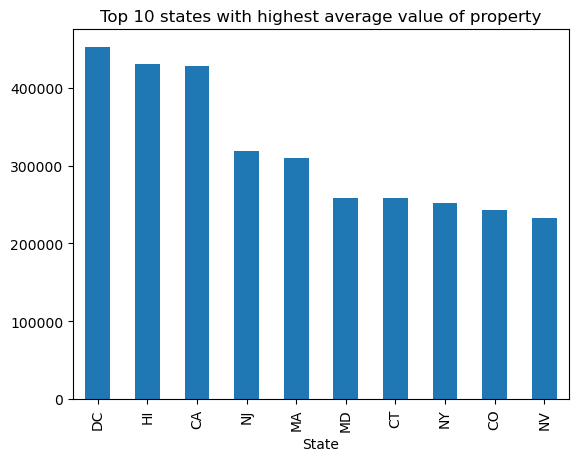

In [28]:
data_top_10_states.plot.bar()
plt.title("Top 10 states with highest average value of property")

In [29]:
# top 10 zip codes (Region Name) in terms of property value
data_top_10_zipcodes=data_new.groupby(['State','RegionName']).aggregate({'value_of_property':'mean'})["value_of_property"].nlargest(10)
data_top_10_zipcodes

State  RegionName
NY     10021         1.157939e+07
       10011         6.789216e+06
       10014         6.268198e+06
       10128         4.780868e+06
CA     94027         3.161780e+06
CO     81611         3.017842e+06
CA     90210         2.472274e+06
FL     33480         2.411922e+06
GA     31561         2.411731e+06
CA     94123         2.394225e+06
Name: value_of_property, dtype: float64

Text(0.5, 1.0, 'Top 10 Zip codes with highest average value of property')

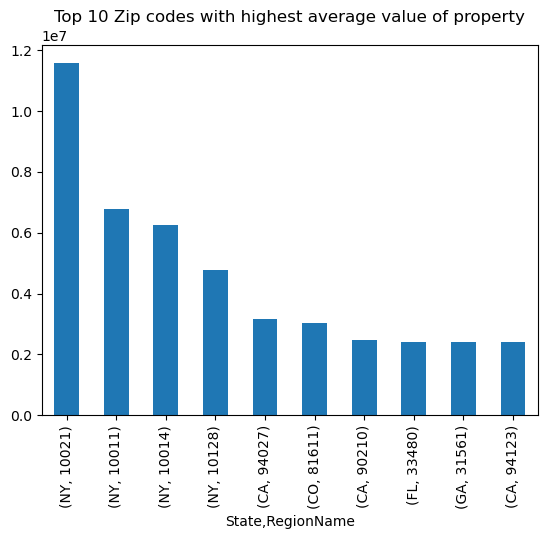

In [30]:
data_top_10_zipcodes.plot.bar()
plt.title("Top 10 Zip codes with highest average value of property")

In [31]:
# group all data (for all zipcodes/states) in a time series
data_all_grouped_by_date = data_new.groupby('date').aggregate({'value_of_property':'mean'})
data_all_grouped_by_date 

,value_of_property
date,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312
...,...
2015-05-01,239354.207702
2015-06-01,240744.121443
2015-07-01,242103.525097


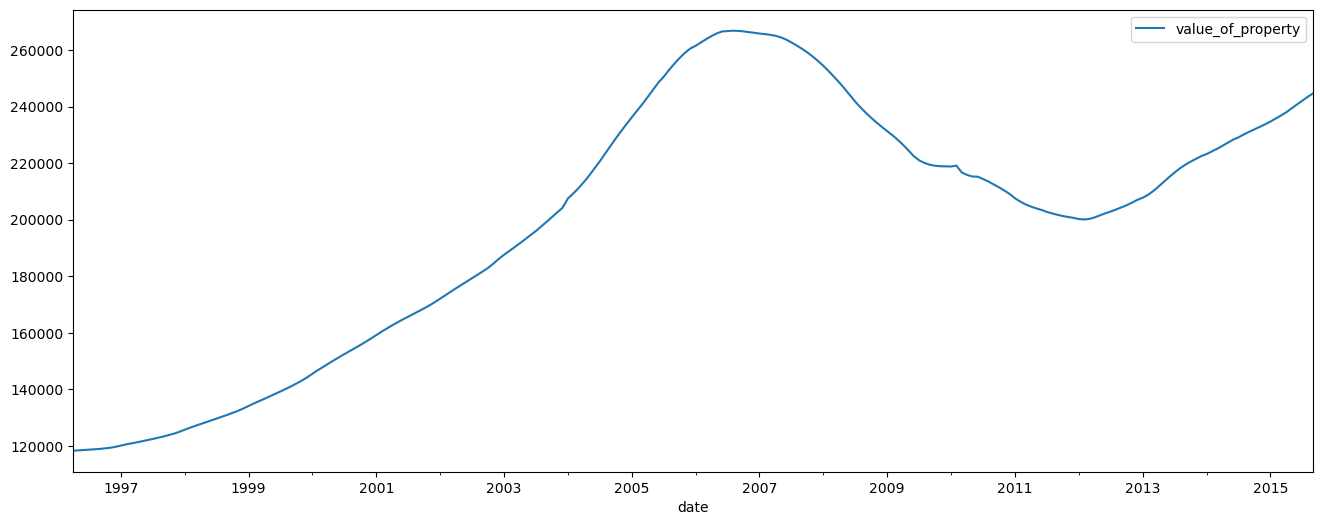

In [32]:
# time series line plot  - for all the data
data_all_grouped_by_date.plot(figsize = (16,6));

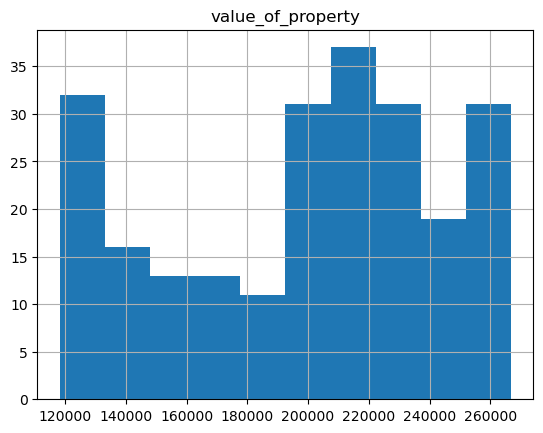

In [33]:
# time series histogram  - for all the data
data_all_grouped_by_date.hist();

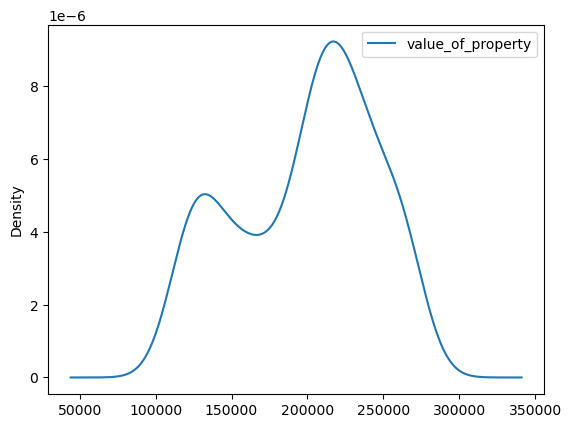

In [34]:
# time series density plot  - for all the data
data_all_grouped_by_date.plot(kind='kde');

In [ ]:
# ??Conclusion of above plots???

In [35]:
# group values using annual frequency
year_groups = data_all_grouped_by_date.groupby(pd.Grouper(freq ='A'))
# Create a new DataFrame and store yearly values in columns 
data_all_annual = pd.DataFrame()

for yr, group in year_groups:
    data_all_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
data_all_annual.plot(figsize = (13,8), subplots=True, legend=True);

ValueError: Length of values (12) does not match length of index (9)

In [36]:
# ??plotting annual data (above) produces error??

In [37]:
# ??why is value_of_property rows more than Region ID/Name rows??
data_new.nunique()

RegionID             14723
RegionName           14723
City                  7554
State                   51
Metro                  702
CountyName            1212
SizeRank             14723
value_of_property    21991
dtype: int64

In [ ]:
# ??Maybe we stick to analysing a few zip codes eg the top 5??
# how to isolate and analyse data for one zip code as a time series
# e.g. the top zip code - Region Name 10021 in NY State??